# MMClassification Python API

In this tutorial, we will introduce the following content:

* Inference a model with Python API
* Fine-tune a model with Python API

## Environment

In [19]:
# Check PyTorch installation
import torch, torchvision
print(torch.__version__)
print(torch.cuda.is_available())

1.10.0
True


In [20]:
# Check MMCV
!/global/homes/m/maoli/.conda/envs/tutorial/bin/mim list

Package    Version    Source
---------  ---------  ----------------------------------------------
mmcls      0.18.0     https://github.com/open-mmlab/mmclassification
mmcv-full  1.3.18     https://github.com/open-mmlab/mmcv


In [21]:
# Check MMClassification installation
import mmcls
print(mmcls.__version__)

0.18.0


## Inference a Model with Python API

MMClassification provides many pre-trained models [model zoo](https://mmclassification.readthedocs.io/en/latest/model_zoo.html). Almost all models can reproduce the results in original papers or reach higher metrics. And we can use these models directly.

To use the pre-trained model, we need to do the following steps:

- Prepare the model
  - Prepare the config file
  - Prepare the checkpoint file
- Build the model
- Inference with the model

### Download Example Image

In [22]:
# Get the demo image
!wget https://www.dropbox.com/s/k5fsqi6qha09l1v/banana.png?dl=0 -O banana.png

--2021-12-01 01:43:33--  https://www.dropbox.com/s/k5fsqi6qha09l1v/banana.png?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:601b:18::a27d:812, 162.125.8.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:601b:18::a27d:812|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/k5fsqi6qha09l1v/banana.png [following]
--2021-12-01 01:43:33--  https://www.dropbox.com/s/raw/k5fsqi6qha09l1v/banana.png
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf5d5c89b5931a8415b062727fa.dl.dropboxusercontent.com/cd/0/inline/BbAv8Y9791C_ldgqIGPHaiK_dA_TBxXW_YO1I2Jw4h7P2zSWmQYiqifqe0-ViWPGLXS-HjFarV0DHq5Ptqr9CXhbDIBfbcMc6TTdxEzrkRKiBe9znDfijp08WOXKOVVco60pn_NpDRsKQeAUgt4goi34/file# [following]
--2021-12-01 01:43:34--  https://ucf5d5c89b5931a8415b062727fa.dl.dropboxusercontent.com/cd/0/inline/BbAv8Y9791C_ldgqIGPHaiK_dA_TBxXW_YO1I2Jw4h7P2zSWmQYiqifqe0-ViWPGLXS-HjFarV0

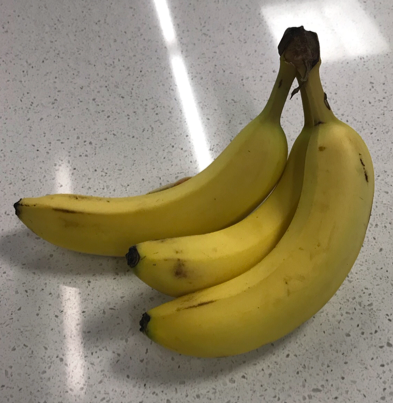

In [23]:
from PIL import Image
Image.open('banana.png')

### Config and checkpoint file

In [24]:
# Confirm the config file exists
!ls configs/mobilenet_v2/mobilenet-v2_8xb32_in1k.py

# Specify the path of the config file and checkpoint file.
config_file = 'configs/mobilenet_v2/mobilenet-v2_8xb32_in1k.py'
checkpoint_file = 'https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth'

configs/mobilenet_v2/mobilenet-v2_8xb32_in1k.py


### Inference the model

MMClassification provides high-level Python API to inference models. At first, we build the MobilenetV2 model and load the checkpoint.

In [25]:
import mmcv
from mmcls.apis import inference_model, init_model, show_result_pyplot

# Specify the device, if you cannot use GPU, you can also use CPU 
# by specifying `device='cpu'`.
device = 'cuda:0'
# device = 'cpu'

# Build the model according to the config file and load the checkpoint.
model = init_model(config_file, checkpoint_file, device=device)

load checkpoint from http path: https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth


/global/homes/m/maoli/.conda/envs/tutorial/lib/python3.8/site-packages/mmcls/apis/inference.py:45: UserWarning: Class names are not saved in the checkpoint's meta data, use imagenet by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


In [26]:
# The model's inheritance relationship
model.__class__.__mro__

(mmcls.models.classifiers.image.ImageClassifier,
 mmcls.models.classifiers.base.BaseClassifier,
 mmcv.runner.base_module.BaseModule,
 torch.nn.modules.module.Module,
 object)

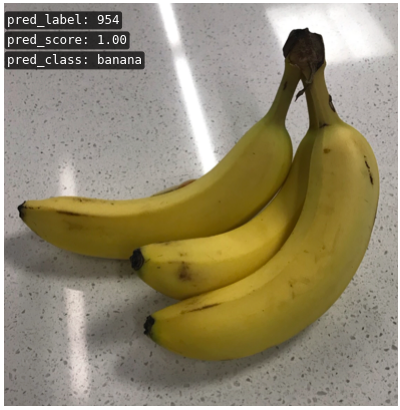

In [27]:
# The inference result in a single image
img = 'banana.png'
img_array =  mmcv.imread(img)
result = inference_model(model, img_array)

%matplotlib inline
# Visualize the inference result
show_result_pyplot(model, img, result)

## Fine-tune a model with Python API

Fine-tuning is to re-train a model which has been trained on another dataset (like ImageNet) to fit our target dataset. Compared with training from scratch, fine-tuning is much faster can avoid over-fitting problems during training on a small dataset.

The basic steps of fine-tuning are as below:

1. Prepare the target dataset and meet MMClassification's requirements.
2. Modify the training config.
3. Start training and validation.

More details are in [the docs](https://mmclassification.readthedocs.io/en/latest/tutorials/finetune.html).

### Download and prepare new Dog and Cat dataset

In [28]:
# Download the cats & dogs dataset
!wget https://www.dropbox.com/s/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip?dl=0 -O cats_dogs_dataset.zip
!mkdir -p data
!unzip -qo cats_dogs_dataset.zip -d ./data/

--2021-12-01 01:43:35--  https://www.dropbox.com/s/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:601b:18::a27d:812, 162.125.8.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:601b:18::a27d:812|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip [following]
--2021-12-01 01:43:36--  https://www.dropbox.com/s/raw/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc488bc2f5a1214177436834c659.dl.dropboxusercontent.com/cd/0/inline/BbDgIeS1ojT30e_qvF9XNSmuefGZWpFFHfUc-xuNgQ-RcqdGbo2Nu1dw7ZS7TcMHG12AD5Yitx7ayacJnfaRGY8km50JWzlhTo9CU-c5EE3GGiIbqBTqlHCynK-sF631bM5cv6MXLINXe9U8AH21lbBu/file# [following]
--2021-12-01 01:43:36--  https://uc488bc2f5a1214177436834c659.dl.dropboxusercontent.com/cd/0/inline/BbDgIeS1ojT30e_qvF9XNSmu

### Read and Modify the config file

Modification is done through Python API

In [29]:
# Load the base config file
from mmcv import Config
cfg = Config.fromfile('configs/mobilenet_v2/mobilenet-v2_8xb32_in1k.py')

# Modify the number of classes in the head.
cfg.model.head.num_classes = 2
cfg.model.head.topk = (1, )

# Load the pre-trained model's checkpoint.
cfg.model.backbone.init_cfg = dict(type='Pretrained', checkpoint=checkpoint_file, prefix='backbone')

# Specify sample size and number of workers.
cfg.data.samples_per_gpu = 32
cfg.data.workers_per_gpu = 2

# Specify the path and meta files of training dataset
cfg.data.train.data_prefix = 'data/cats_dogs_dataset/training_set/training_set'
cfg.data.train.classes = 'data/cats_dogs_dataset/classes.txt'

# Specify the path and meta files of validation dataset
cfg.data.val.data_prefix = 'data/cats_dogs_dataset/val_set/val_set'
cfg.data.val.ann_file = 'data/cats_dogs_dataset/val.txt'
cfg.data.val.classes = 'data/cats_dogs_dataset/classes.txt'

# Specify the path and meta files of test dataset
cfg.data.test.data_prefix = 'data/cats_dogs_dataset/test_set/test_set'
cfg.data.test.ann_file = 'data/cats_dogs_dataset/test.txt'
cfg.data.test.classes = 'data/cats_dogs_dataset/classes.txt'

# Specify the normalization parameters in data pipeline
normalize_cfg = dict(type='Normalize', mean=[124.508, 116.050, 106.438], std=[58.577, 57.310, 57.437], to_rgb=True)
cfg.data.train.pipeline[3] = normalize_cfg
cfg.data.val.pipeline[3] = normalize_cfg
cfg.data.test.pipeline[3] = normalize_cfg

# Modify the evaluation metric
cfg.evaluation['metric_options']={'topk': (1, )}

# Specify the optimizer
cfg.optimizer = dict(type='SGD', lr=0.005, momentum=0.9, weight_decay=0.0001)
cfg.optimizer_config = dict(grad_clip=None)

# Specify the learning rate scheduler
cfg.lr_config = dict(policy='step', step=1, gamma=0.1)
cfg.runner = dict(type='EpochBasedRunner', max_epochs=2)

# Specify the work directory
cfg.work_dir = './work_dirs/cats_dogs_dataset'

# Output logs for every 10 iterations
cfg.log_config.interval = 10

# Set the random seed and enable the deterministic option of cuDNN
# to keep the results' reproducible.
from mmcls.apis import set_random_seed
cfg.seed = 0
set_random_seed(0, deterministic=True)

cfg.gpu_ids = range(1)

### Finetune the model on new dataset

In [30]:
import time
import mmcv
import os.path as osp

from mmcls.datasets import build_dataset
from mmcls.models import build_classifier
from mmcls.apis import train_model

# Create the work directory
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
# Build the classifier
model = build_classifier(cfg.model)
model.init_weights()
# Build the dataset
datasets = [build_dataset(cfg.data.train)]
# Add `CLASSES` attributes to help visualization
model.CLASSES = datasets[0].CLASSES
# Start fine-tuning
train_model(
    model,
    datasets,
    cfg,
    distributed=False,
    validate=True,
    timestamp=time.strftime('%Y%m%d_%H%M%S', time.localtime()),
    meta=dict())

2021-12-01 01:43:47,738 - mmcv - INFO - initialize MobileNetV2 with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth', 'prefix': 'backbone'}
2021-12-01 01:43:47,751 - mmcv - INFO - load backbone in model from: https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth
2021-12-01 01:43:47,792 - mmcv - INFO - initialize LinearClsHead with init_cfg {'type': 'Normal', 'layer': 'Linear', 'std': 0.01}
2021-12-01 01:43:47,793 - mmcv - INFO - 
backbone.conv1.conv.weight - torch.Size([32, 3, 3, 3]): 
PretrainedInit: load from https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth 
 
2021-12-01 01:43:47,794 - mmcv - INFO - 
backbone.conv1.bn.weight - torch.Size([32]): 
PretrainedInit: load from https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilen

load checkpoint from http path: https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth


2021-12-01 01:43:47,967 - mmcls - INFO - Start running, host: maoli@cgpu14, work_dir: /global/u2/m/maoli/OpenMMLab/work_dirs/cats_dogs_dataset
2021-12-01 01:43:47,968 - mmcls - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(LOW         ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) StepLrUpdaterHook                  
(LOW         ) IterTimerHook                      
(LOW         ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_iter:
(VERY_HIGH   ) StepLrUpdaterHook                  
(LOW         ) IterTimerHook                      
(LOW         ) EvalHook                           
 -------------------- 
after_train_iter:
(ABOVE_NORMAL) OptimizerHook                      
(NORMAL      ) Chec

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1601/1601, 197.9 task/s, elapsed: 8s, ETA:     0s

2021-12-01 01:44:28,039 - mmcls - INFO - Epoch(val) [1][51]	accuracy_top-1: 96.6896
2021-12-01 01:44:31,715 - mmcls - INFO - Epoch [2][10/201]	lr: 5.000e-04, eta: 0:00:32, time: 0.366, data_time: 0.283, memory: 2457, loss: 0.1472
2021-12-01 01:44:33,138 - mmcls - INFO - Epoch [2][20/201]	lr: 5.000e-04, eta: 0:00:30, time: 0.144, data_time: 0.072, memory: 2457, loss: 0.1334
2021-12-01 01:44:34,663 - mmcls - INFO - Epoch [2][30/201]	lr: 5.000e-04, eta: 0:00:28, time: 0.152, data_time: 0.080, memory: 2457, loss: 0.1363
2021-12-01 01:44:36,411 - mmcls - INFO - Epoch [2][40/201]	lr: 5.000e-04, eta: 0:00:26, time: 0.173, data_time: 0.080, memory: 2457, loss: 0.1111
2021-12-01 01:44:37,703 - mmcls - INFO - Epoch [2][50/201]	lr: 5.000e-04, eta: 0:00:24, time: 0.129, data_time: 0.042, memory: 2457, loss: 0.1561
2021-12-01 01:44:39,312 - mmcls - INFO - Epoch [2][60/201]	lr: 5.000e-04, eta: 0:00:23, time: 0.163, data_time: 0.086, memory: 2457, loss: 0.1182
2021-12-01 01:44:40,933 - mmcls - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1601/1601, 202.5 task/s, elapsed: 8s, ETA:     0s

2021-12-01 01:45:08,144 - mmcls - INFO - Epoch(val) [2][51]	accuracy_top-1: 97.6265


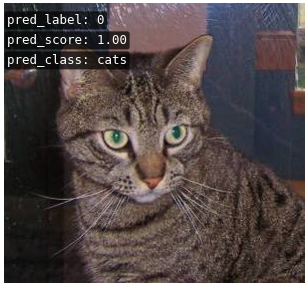

In [31]:
%matplotlib inline
# Validate the fine-tuned model

img = mmcv.imread('data/cats_dogs_dataset/training_set/training_set/cats/cat.1.jpg')

model.cfg = cfg
result = inference_model(model, img)

show_result_pyplot(model, img, result)